### BUILD DYNAMIC MODELS USING SUBCLASSING API

+ Both Sequential and Functional API are declarative.
+ We have to define the layers and how they should be connected.
+ Then we can feed the data and Train the model.
+ This method has many advantages.
    + model can be easily saved.
    + model can b eeasily cloned.
    + model can be easily shared.
    + Its structure can be displayed and analyzed.
    
+ Some models involve loops, varying shapes, conditional branching and othe dynamic behaviour. For that purpose we can choose `SubClassing API`
+ Creates the layers you need in the Constructor.
+ USe them to perform the computations you want in the call method.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
## fetch the data.
housing = fetch_california_housing()
housing.keys()
# housing.data
# housing.target
# housing.target_names
# housing.feature_names
# housing.DESCR
# columns = ["MedInc","HouseAge","AveRooms","AveBedrms","Population","AveOccup","Latitude","Longitude"]
data = pd.DataFrame(housing.data, columns = housing.feature_names)
print(data.head())

## split the data to trainig and testing and validation sets.
print("============Splitting data to Training and Testing Sets===============")
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
print(X_train_full.shape)
print(X_test.shape)
print(y_train_full.shape)
print(y_test.shape)
print("============Splitting data to Training and Validation Sets===============")
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)
print("=============scale the Data using the Standard Scaler================")
## initialize the scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
============Splitting data to Training and Testing Sets===============
(15480, 8)
(5160, 8)
(15480,)
(5160,)
============Splitting data to Training and Validation Sets===============
(11610, 8)
(3870, 8)
(11610,)
(3870,)
=============scale the Data using the Standard Scaler================


In [19]:
## now when doing the fit method.
## we will have to give X_train_A , X_train_B and X_valid_A, X_valid_B for the training and validation sets.
## so defining those parameters.
X_train_A, X_train_B = X_train[:,:5], X_train[:,2:]
print(X_train.shape)
print("A contains 5 features",X_train_A.shape)
print("B contains 6 features",X_train_B.shape)
X_valid_A, X_valid_B = X_valid[:,:5], X_valid[:,2:]
print(X_valid.shape)
print("A contains 5 features",X_valid_A.shape)
print("B contains 6 features",X_valid_B.shape)
X_test_A, X_test_B = X_test[:,:5], X_test[:,2:]
print(X_test.shape)
print("A contains 5 features",X_test_A.shape)
print("B contains 6 features",X_test_B.shape)
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]
print("A contains 5 features",X_new_A.shape)
print("B contains 6 features",X_new_B.shape)

(11610, 8)
A contains 5 features (11610, 5)
B contains 6 features (11610, 6)
(3870, 8)
A contains 5 features (3870, 5)
B contains 6 features (3870, 6)
(5160, 8)
A contains 5 features (5160, 5)
B contains 6 features (5160, 6)
A contains 5 features (3, 5)
B contains 6 features (3, 6)


In [20]:
## subclassing API method
## develop the class.
class WideAndDeep(keras.Model):
    def __init__(self, units = 30, activation = "relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation = activation)
        self.hidden2 = keras.layers.Dense(units, activation = activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        
        return main_output, aux_output

In [21]:
## define the model
model = WideAndDeep()
model.__dict__

{'_self_setattr_tracking': True,
 '_is_model_for_instrumentation': True,
 '_instrumented_keras_api': True,
 '_instrumented_keras_layer_class': False,
 '_instrumented_keras_model_class': True,
 '_trainable': True,
 '_stateful': False,
 'built': False,
 '_input_spec': None,
 '_build_input_shape': None,
 '_saved_model_inputs_spec': None,
 '_saved_model_arg_spec': None,
 '_supports_masking': False,
 '_name': 'wide_and_deep_8',
 '_activity_regularizer': None,
 '_trainable_weights': [],
 '_non_trainable_weights': [],
 '_updates': [],
 '_thread_local': <_thread._local at 0x1af33c7a680>,
 '_callable_losses': [],
 '_losses': [],
 '_metrics': [],
 '_metrics_lock': <unlocked _thread.lock object at 0x000001AF337C5E70>,
 '_dtype_policy': <Policy "float32">,
 '_compute_dtype_object': tf.float32,
 '_autocast': True,
 '_self_tracked_trackables': [<keras.layers.core.dense.Dense at 0x1af337c53a0>,
 '_inbound_nodes_value': [],
 '_outbound_nodes_value': [],
 '_call_spec': <keras.utils.layer_utils.CallFunc

In [12]:
## we van use the model to do the train and fit method.
## and to make predictions.

In [22]:
## compile the model
## we have to give the loss function to each outputs.
model.compile(
                loss = ["mse","mse"],
                optimizer = "sgd",
                metrics = "accuracy",
                loss_weights = [0.9, 1.0]
)

In [23]:
## train the model
## train the model
history = model.fit(
                    (X_train_A, X_train_B),
                    [y_train,y_train],
                    epochs = 20,
                    validation_data=([X_valid_A,X_valid_B], [y_valid, y_valid])
)

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 1.6436 - output_1_loss: 0.7382 - output_2_loss: 0.9792 - output_1_accuracy: 0.0029 - output_2_accuracy: 0.0031 - val_loss: 4.2118 - val_output_1_loss: 1.1245 - val_output_2_loss: 3.1998 - val_output_1_accuracy: 0.0021 - val_output_2_accuracy: 0.0021
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.9805 - output_1_loss: 0.4413 - output_2_loss: 0.5834 - output_1_accuracy: 0.0029 - output_2_accuracy: 0.0032 - val_loss: 4.0781 - val_output_1_loss: 1.4299 - val_output_2_loss: 2.7913 - val_output_1_accuracy: 0.0021 - val_output_2_accuracy: 0.0021
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.9046 - output_1_loss: 0.4178 - output_2_loss: 0.5285 - output_1_accuracy: 0.0029 - output_2_accuracy: 0.0032 - val_loss: 1.6283 - val_output_1_loss: 0.5907 - val_output_2_loss: 1.0966 - val_output_1_accuracy: 0.0021 - val_output_2_accuracy: 0.0021
Epoch 4/20
363/363 [========

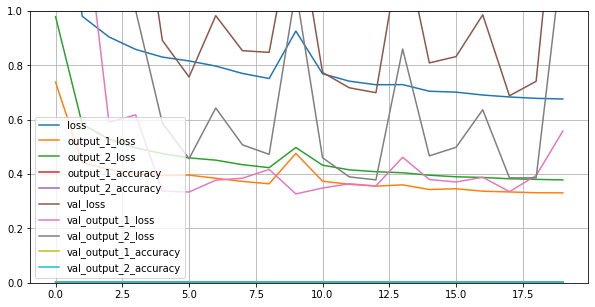

In [25]:
## plotting the scores
pd.DataFrame(history.history).plot(figsize = (10,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

### SAVING THE MODEL